In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

import datapane as dp

In [2]:
data = pd.read_csv("data_supercleaned.csv")

In [5]:
df_radar_bar = data[['Avg Salary (K)', 'Job Location (State)']]
df_radar_bar = df_radar_bar.groupby('Job Location (State)', as_index=False)['Avg Salary (K)'].mean()
df_radar_bar

,Job Location (State),Avg Salary (K)
0,AL,57.937500
1,AZ,85.666667
2,CA,123.513158
3,CO,86.181818
4,CT,71.100000
5,DC,110.181818
6,DE,56.500000
7,FL,77.625000
8,GA,80.666667
9,IA,78.900000


In [10]:
# Bars are sorted by the cumulative track length
df_sorted = df_radar_bar.sort_values("Avg Salary (K)", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["Avg Salary (K)"].values

# Mean gain length
#MEAN_GAIN = df_sorted["mean_gain"].values

# Region label
REGION = df_sorted["Job Location (State)"].values

# Number of tracks per region
TRACKS_N = df_sorted["Avg Salary (K)"].values

In [11]:
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))

In [15]:
LENGTHS

array([123.51315789, 116.6625    , 110.18181818, 107.49514563,
       104.55882353, 100.25      , 100.        ,  98.65277778,
        98.45238095,  97.35714286,  97.        ,  95.62195122,
        94.15      ,  93.86363636,  93.19047619,  92.67857143,
        92.125     ,  90.3       ,  89.26923077,  87.57142857,
        87.        ,  86.18181818,  85.66666667,  85.5       ,
        84.72222222,  80.66666667,  78.9       ,  77.625     ,
        74.33333333,  73.3       ,  71.1       ,  60.5       ,
        57.9375    ,  57.625     ,  56.5       ,  56.25      ,
        54.25      ])

/var/folders/_n/1v5b_8nj0bj0h_5qsl8_5wqh0000gn/T/ipykernel_84329/2105444298.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


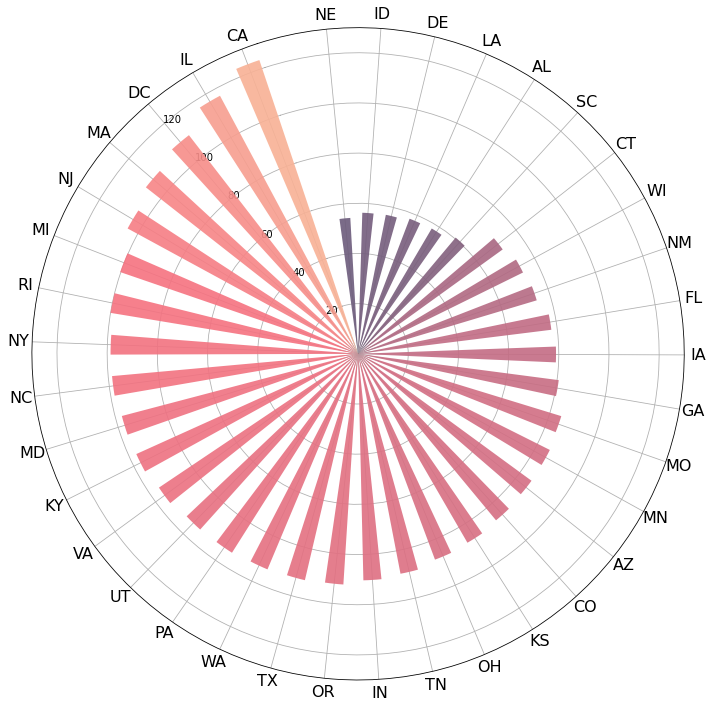

In [37]:
# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(0, 130)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.08, zorder=10)

# Add dashed vertical lines. These are just references
#ax.vlines(ANGLES, 0, 125, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
#ax.scatter(ANGLES, MEAN_GAIN, s=60, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in REGION]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=16);

#report = dp.Report(
#  dp.Plot(fig, caption="matplot")
#)

#report.save("matplot.html", open=True)
#report.upload(name='matplot')


fig.show()